# Early Stopping

#### Stop training when a monitored metric has stopped improving.
Model.fit() training loop will check at end of every epoch whether the loss is no longer decreasing, considering the min_delta and patience if applicable. Once it's found no longer decreasing, model.stop_training is marked True and the training terminates.

The quantity to be monitored needs to be available in logs dict. To make it so, pass the loss or metrics at model.compile().

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                448       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 481
Trainable params: 481
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
33/33 [==============================] - 0s 8ms/step - loss: 165.2118 - val_loss: 93.1914
Epoch 2/100
33/33 [==============================] - 0s 2ms/step - loss: 85.6561 - val_loss: 88.0093
Epoch 3/100
33/33 [==============================] - 0s 2ms/step - loss: 86.0058 - val_loss: 85.4700
Epoch 4/100
33/33 [==============================] - 0s 3ms/step - loss: 85.5345 - val_loss: 85.0126
Epoch 5/100
33/33 [==============================] - 0s 3ms/step - loss: 87.2280 - val_loss: 100.5820


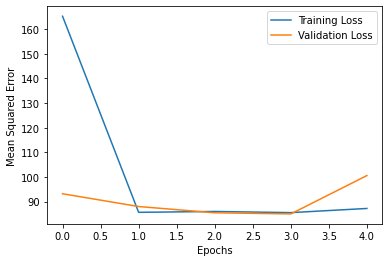

Model MSE on test data =  83.516335


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras import regularizers, optimizers
from keras.layers import Dense, Dropout, Input
from keras.models import Sequential, load_model
from keras.callbacks import EarlyStopping
from keras.datasets import boston_housing
from keras.losses import MeanSquaredError

#Load Boston Housing Dataset
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

#Build model
model = Sequential()
model.add(Input(shape=(13,)))
model.add(Dense(32, activation='tanh', 
                kernel_regularizer = regularizers.l1_l2(l1=1e-5, l2=1e-4)))
model.add(Dense(1,activation='relu'))

mse = MeanSquaredError()
adam = optimizers.Adam(learning_rate=.1, decay=1e-3)

model.compile(optimizer = adam, loss = mse, metrics = None)
print(model.summary())

#create callback
filepath = 'my_best_model.hdf5'
checkpoint = EarlyStopping(
    monitor='val_loss', min_delta=0, patience=0, verbose=0,
    mode='auto', baseline=None, restore_best_weights=False)

callbacks = [checkpoint]

#fit the model
history = model.fit(pd.DataFrame(X_train).apply(np.asarray),
                  y_train,
                  batch_size=10,
                  epochs=100,
                  validation_split=0.2,
                  callbacks=callbacks)

#plot the training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.savefig('model_training_history')
plt.show()

#Load and evaluate the best model version
model = load_model(filepath)
yhat = model.predict(X_test)
print('Model MSE on test data = ', mse(y_test, yhat).numpy())

# LR Decay on Plateau
#### Reduce learning rate when a metric has stopped improving.
Models often benefit from reducing the learning rate by a factor of 2-10 once learning stagnates. This callback monitors a quantity and if no improvement is seen for a 'patience' number of epochs, the learning rate is reduced.

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 32)                448       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 481
Trainable params: 481
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
33/33 [==============================] - 0s 6ms/step - loss: 146.8128 - val_loss: 93.7051
Epoch 2/100
33/33 [==============================] - 0s 2ms/step - loss: 84.5983 - val_loss: 87.1331
Epoch 3/100
33/33 [==============================] - 0s 2ms/step - loss: 84.6786 - val_loss: 84.8477
Epoch 4/100
33/33 [==============================] - 0s 2ms/step - loss: 86.1030 - val_loss: 84.6108
Epoch 5/100
33/33 [==============================] - 0s 2ms/step - loss: 92.6686 - val_loss: 93.2306
Epoch 6

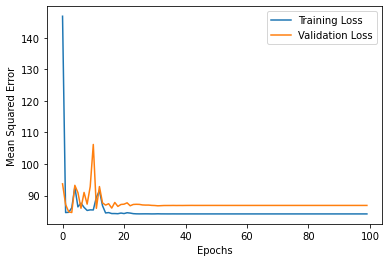

Model MSE on test data =  83.516335


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras import regularizers, optimizers
from keras.layers import Dense, Dropout, Input
from keras.models import Sequential, load_model
from keras.callbacks import ReduceLROnPlateau
from keras.datasets import boston_housing
from keras.losses import MeanSquaredError

#Load Boston Housing Dataset
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

#Build model
model = Sequential()
model.add(Input(shape=(13,)))
model.add(Dense(32, activation='tanh', 
                kernel_regularizer = regularizers.l1_l2(l1=1e-5, l2=1e-4)))
model.add(Dense(1,activation='relu'))

mse = MeanSquaredError()
adam = optimizers.Adam(learning_rate=.1, decay=1e-3)

model.compile(optimizer = adam, loss = mse, metrics = None)
print(model.summary())

#create callback
filepath = 'my_best_model.hdf5'
checkpoint = ReduceLROnPlateau(
    monitor='val_loss', factor=0.1, patience=10, verbose=0,
    mode='auto', min_delta=0.0001, cooldown=0, min_lr=0)

callbacks = [checkpoint]

#fit the model
history = model.fit(pd.DataFrame(X_train).apply(np.asarray),
                  y_train,
                  batch_size=10,
                  epochs=100,
                  validation_split=0.2,
                  callbacks=callbacks)

#plot the training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.savefig('model_training_history')
plt.show()

#Load and evaluate the best model version
model = load_model(filepath)
yhat = model.predict(X_test)
print('Model MSE on test data = ', mse(y_test, yhat).numpy())

# ModelCheckpoint
#### Callback to save the Keras model or model weights at some frequency.
ModelCheckpoint callback is used in conjunction with training using model.fit() to save a model or weights (in a checkpoint file) at some interval, so the model or weights can be loaded later to continue the training from the state saved.

A few options this callback provides include:

##### Whether to only keep the model that has achieved the "best performance" so far, or whether to save the model at the end of every epoch regardless of performance.
##### Definition of 'best'; which quantity to monitor and whether it should be maximized or minimized.
##### The frequency it should save at. Currently, the callback supports saving at the end of every epoch, or after a fixed number of training batches.
##### Whether only weights are saved, or the whole model is saved.

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 32)                448       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 33        
Total params: 481
Trainable params: 481
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
 1/33 [..............................] - ETA: 0s - loss: 697.9961WARNING:tensorflow:Callbacks method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0006s vs `on_train_batch_end` time: 0.0009s). Check your callbacks.

Epoch 00001: val_loss improved from inf to 84.56575, saving model to my_best_model.hdf5
33/33 [==============================] - 0s 7ms/step - loss: 128.0195 - val_loss: 84.5658
Epoch 2/100
 1/33 [..............................] - ETA: 0s - loss: 142.9682
Epoc

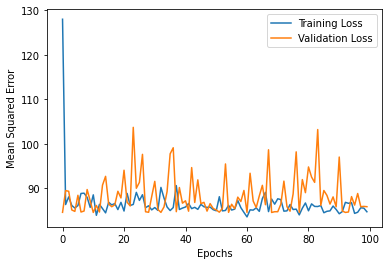

Model MSE on test data =  83.60975


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras import regularizers, optimizers
from keras.layers import Dense, Dropout, Input
from keras.models import Sequential, load_model
from keras.callbacks import ModelCheckpoint
from keras.datasets import boston_housing
from keras.losses import MeanSquaredError

#Load Boston Housing Dataset
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

#Build model
model = Sequential()
model.add(Input(shape=(13,)))
model.add(Dense(32, activation='tanh', 
                kernel_regularizer = regularizers.l1_l2(l1=1e-5, l2=1e-4)))
model.add(Dense(1,activation='relu'))

mse = MeanSquaredError()
adam = optimizers.Adam(learning_rate=.1, decay=1e-3)

model.compile(optimizer = adam, loss = mse, metrics = None)
print(model.summary())

#create callback
filepath = 'my_best_model.hdf5'
checkpoint = ModelCheckpoint(filepath=filepath, 
                             monitor='val_loss',
                             verbose=1, 
                             save_best_only=True,
                             mode='min')
callbacks = [checkpoint]

#fit the model
history = model.fit(pd.DataFrame(X_train).apply(np.asarray),
                  y_train,
                  batch_size=10,
                  epochs=100,
                  validation_split=0.2,
                  callbacks=callbacks)

#plot the training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.savefig('model_training_history')
plt.show()

#Load and evaluate the best model version
model = load_model(filepath)
yhat = model.predict(X_test)
print('Model MSE on test data = ', mse(y_test, yhat).numpy())